In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [42]:
df_p=pd.read_csv('FINAL PUT DATA.csv')
df_p

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS
0,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762
1,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797
2,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820
3,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833
4,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845
...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552


In [43]:
df_p=df_p.abs()
df_p

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS
0,172.17,0.008219,135.0,0.02,0.00103,0.00027,0.00070,0.00390,0.00000,0.77790,0.000762
1,172.17,0.008219,140.0,0.01,0.00095,0.00038,0.00059,0.00447,0.00000,0.67034,0.000797
2,172.17,0.008219,144.0,0.01,0.00151,0.00046,0.00119,0.00462,0.00043,0.58576,0.000820
3,172.17,0.008219,145.0,0.01,0.00214,0.00056,0.00065,0.00460,0.00000,0.56515,0.000833
4,172.17,0.008219,146.0,0.01,0.00191,0.00055,0.00094,0.00450,0.00000,0.54460,0.000845
...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,0.69845,0.00415,1.41879,0.02242,5.75046,0.19411,59.202701
241799,293.20,2.060274,360.0,82.05,0.74304,0.00396,1.30360,0.02135,6.15503,0.18650,65.179230
241800,293.20,2.060274,370.0,111.23,0.78759,0.00361,1.15885,0.01832,6.57983,0.17749,71.388575
241801,293.20,2.060274,380.0,97.00,0.83230,0.00330,0.98488,0.01639,7.00828,0.16808,78.021552


In [44]:
n = len(df_p)
n_train =  (int)(0.7 * n)
print(n_train)

193442


In [45]:
train = df_p[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]', ' [P_GAMMA]', ' [P_VEGA]', ' [P_RHO]', ' [P_DELTA]', ' [P_THETA]']].values
y_train = train[' [P_LAST]'].values

In [46]:
test = df_p[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]', ' [P_GAMMA]', ' [P_VEGA]', ' [P_RHO]', ' [P_DELTA]', ' [P_THETA]']].values
y_test = test[' [P_LAST]'].values

In [47]:
from keras.layers import Activation, LeakyReLU, BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard


In [48]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.25))

model.add(Dense(128, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(LeakyReLU())
          
model.compile(loss=('mean_absolute_error'), optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                640       
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)                256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

In [51]:
callback_es = EarlyStopping(monitor='val_loss', patience=4, verbose=2, restore_best_weights=True)
callback_tb = TensorBoard(log_dir=r"C:\Users\shrey\Desktop\Black-Scholes ML\Models\MLP_Greeks")


In [52]:
model.fit(X_train, y_train, batch_size=64, epochs=30, verbose=2, 
          callbacks=[callback_es, callback_tb], validation_data=(X_test, y_test))


Epoch 1/30
3023/3023 - 39s - loss: 5.3275 - mean_absolute_error: 5.3275 - mean_squared_error: 161.8773 - val_loss: 5.3598 - val_mean_absolute_error: 5.3598 - val_mean_squared_error: 81.3729
Epoch 2/30
3023/3023 - 34s - loss: 4.2755 - mean_absolute_error: 4.2755 - mean_squared_error: 111.1749 - val_loss: 7.2082 - val_mean_absolute_error: 7.2082 - val_mean_squared_error: 143.2184
Epoch 3/30
3023/3023 - 34s - loss: 4.1483 - mean_absolute_error: 4.1483 - mean_squared_error: 108.2554 - val_loss: 4.5981 - val_mean_absolute_error: 4.5981 - val_mean_squared_error: 45.1174
Epoch 4/30
3023/3023 - 33s - loss: 4.0766 - mean_absolute_error: 4.0766 - mean_squared_error: 108.4928 - val_loss: 8.7025 - val_mean_absolute_error: 8.7025 - val_mean_squared_error: 235.6758
Epoch 5/30
3023/3023 - 34s - loss: 4.0250 - mean_absolute_error: 4.0250 - mean_squared_error: 104.8255 - val_loss: 6.1061 - val_mean_absolute_error: 6.1061 - val_mean_squared_error: 83.2034
Epoch 6/30
3023/3023 - 36s - loss: 3.9968 - mean

In [53]:
y_train_pred = model.predict(X_train)

In [54]:
y_train_pred=np.ravel(y_train_pred)

In [55]:
train['Put_MLP']=y_train_pred
train

<ipython-input-55-b1fd68c85126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Put_MLP']=y_train_pred


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_MLP
0,172.17,0.008219,135.0,0.02,0.00103,0.00027,0.00070,0.00390,0.00000,0.77790,0.000762,3.548702
1,172.17,0.008219,140.0,0.01,0.00095,0.00038,0.00059,0.00447,0.00000,0.67034,0.000797,3.994969
2,172.17,0.008219,144.0,0.01,0.00151,0.00046,0.00119,0.00462,0.00043,0.58576,0.000820,4.401336
3,172.17,0.008219,145.0,0.01,0.00214,0.00056,0.00065,0.00460,0.00000,0.56515,0.000833,4.512198
4,172.17,0.008219,146.0,0.01,0.00191,0.00055,0.00094,0.00450,0.00000,0.54460,0.000845,4.627199
...,...,...,...,...,...,...,...,...,...,...,...,...
193437,214.17,1.027397,155.0,4.46,0.12413,0.00311,0.44139,0.01916,0.32058,0.30502,3.652016,4.002561
193438,214.17,1.027397,160.0,5.83,0.14293,0.00347,0.48723,0.02060,0.37064,0.29946,4.295409,4.521107
193439,214.17,1.027397,165.0,6.40,0.16341,0.00380,0.53343,0.02258,0.42650,0.29488,5.067588,5.109915
193440,214.17,1.027397,170.0,7.39,0.18667,0.00430,0.57907,0.02431,0.48686,0.28879,5.859640,5.722087


In [56]:
train[train['Put_MLP']<0]

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_MLP
1278,174.35,0.279342,2.5,0.01,0.00027,0.00000,0.00020,0.00072,0.00039,2.68739,0.009319,-0.018927
6505,160.23,0.210849,120.0,0.12,0.01892,453304.46015,11.65383,0.00630,0.00669,0.31146,0.144894,-7633.328613
13152,176.21,0.134137,2.5,0.02,0.00000,0.00000,0.00051,0.00144,0.00006,3.86519,0.008872,-0.010859
13513,176.82,0.125918,2.5,0.02,0.00000,0.00000,0.00006,0.00090,0.00039,3.98989,0.008828,-0.010124
21253,168.38,0.536986,2.5,0.02,0.00000,0.00000,0.00003,0.00000,0.00007,1.81880,0.004676,-0.014413
...,...,...,...,...,...,...,...,...,...,...,...,...
141761,190.00,0.054795,20.0,0.01,0.00008,0.00000,0.00042,0.00187,0.00021,2.84255,0.003582,-0.003598
142935,194.04,0.043836,20.0,0.01,0.00032,0.00000,0.00008,0.00126,0.00034,3.18477,0.003303,-0.003473
143493,195.34,0.041096,20.0,0.01,0.00033,0.00000,0.00035,0.00215,0.00000,3.29106,0.003214,-0.003468
144092,195.72,0.038356,20.0,0.01,0.00020,0.00000,0.00000,0.00240,0.00042,3.40128,0.003112,-0.002347


In [57]:
# train=train[train['Put_MLP']>0]

In [58]:
y_true=train[' [P_LAST]']
y_pred=train['Put_MLP']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  5.098237817280418
MSE =  75.68507580377938
RMSE =  8.699716995614247


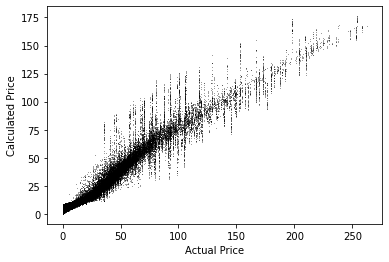

In [59]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

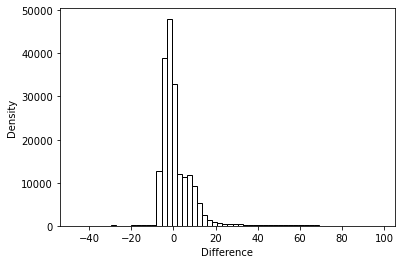

In [60]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [61]:
y_test_pred=model.predict(X_test)

In [62]:
y_test_pred=np.ravel(y_test_pred)

In [63]:
test['Put_MLP']=y_test_pred
test

<ipython-input-63-5677432c360a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Put_MLP']=y_test_pred


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_MLP
193443,214.17,1.027397,185.0,10.90,0.26679,0.00548,0.70860,0.02796,0.70385,0.27257,8.951159,7.598210
193444,214.17,1.027397,190.0,12.41,0.29773,0.00593,0.74642,0.02939,0.78742,0.26723,10.218147,8.198447
193445,214.17,1.027397,195.0,14.60,0.33045,0.00630,0.77897,0.02993,0.87736,0.26318,11.709845,8.974794
193446,214.17,1.027397,200.0,15.95,0.36444,0.00667,0.80757,0.03090,0.97194,0.25807,13.266808,9.949515
193447,214.17,1.027397,205.0,18.23,0.39961,0.00692,0.82983,0.03191,1.07170,0.25302,14.975297,10.993951
...,...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,0.69845,0.00415,1.41879,0.02242,5.75046,0.19411,59.202701,59.219624
241799,293.20,2.060274,360.0,82.05,0.74304,0.00396,1.30360,0.02135,6.15503,0.18650,65.179230,67.747314
241800,293.20,2.060274,370.0,111.23,0.78759,0.00361,1.15885,0.01832,6.57983,0.17749,71.388575,75.577156
241801,293.20,2.060274,380.0,97.00,0.83230,0.00330,0.98488,0.01639,7.00828,0.16808,78.021552,82.965828


In [64]:
y_true=test[' [P_LAST]']
y_pred=test['Put_MLP']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  4.598092609965012
MSE =  45.11736282139485
RMSE =  6.716945944504455


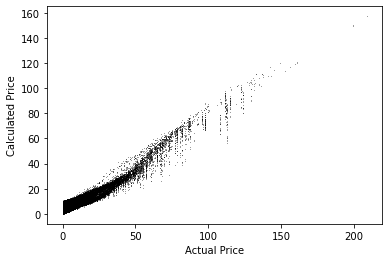

In [65]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

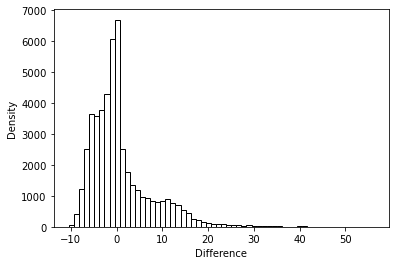

In [66]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [1]:
# train.to_csv('MLP_GREEKS PUT train FINAL Results.csv', mode='a', index=False, header=True)

NameError: name 'train' is not defined

In [68]:
# test.to_csv('MLP_GREEKS PUT test FINAL Results.csv', mode='a', index=False, header=True)

In [69]:
# model.save('MLP_Put_Greeks.h5')